# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [1]:
# Acá instalamos la biblioteca fitter para el ajuste de funciones
pip install fitter

SyntaxError: invalid syntax (1900610083.py, line 2)

In [2]:
# Acá importarmos todas las bibliotecas necesarias: Pandas, Numpy, Scipy y Fitter
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Esto se hace para montar el gogle drive y poder acceder datos alojados allí.
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Carga de datos

Utilizaremos los datos de recorrido de bicicletas públicas de la ciudad de Buenos Aires
https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Bajaremos el archivo "Recorridos Realizados 2023 (ZIP)", descomprimiremos el archivo csv presente ("trips_2023.csv")y lo alojamos dentro de la carpeta "Colab Notebooks" de nuestro Google Drive




In [5]:
# En esta parte del código se debe modificar la ubicación correcta del google drive
# bicis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPIO/Datos/trips_2023.csv')
bicis = pd.read_csv('./badata_ecobici_recorridos_realizados_2024.csv')

# 3. Análisis Exploratorio de Datos

In [6]:
# Corroboramos que el tipo de dato de la variable "bicis" es un dataframe
type(bicis)

pandas.core.frame.DataFrame

In [7]:
# Primeras lineas de nuestro dataframe
bicis.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE


In [8]:
# Si solo quiero los nombres de las columnas en formato lista
bicis.columns

Index(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen',
       'direccion_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero'],
      dtype='object')

In [9]:
# Dimensionalidad del dataframe
bicis.shape

(3559284, 17)

In [10]:
# El tipo de dato de cada una de las columnas
# Acá veo que 'duracion_recorrido', 'fecha_origen_recorrido' y 'fecha_destino_recorrido'
# son de tipo object (texto) y no está bueno eso
bicis.dtypes

id_recorrido                    int64
duracion_recorrido              int64
fecha_origen_recorrido         object
id_estacion_origen              int64
nombre_estacion_origen         object
direccion_estacion_origen      object
long_estacion_origen          float64
lat_estacion_origen           float64
fecha_destino_recorrido        object
id_estacion_destino             int64
nombre_estacion_destino        object
direccion_estacion_destino     object
long_estacion_destino         float64
lat_estacion_destino          float64
id_usuario                    float64
modelo_bicicleta               object
genero                         object
dtype: object

In [11]:
# Para acceder a una columna específica puedo usar el operador punto:
bicis.nombre_estacion_origen

0                    308 - SAN MARTIN II
1                 133 - BEIRO Y SEGUROLA
2                     328 - SARMIENTO II
3                         204 - Biarritz
4                 137 - AZOPARDO Y CHILE
                       ...              
3559279               093 - CARLOS CALVO
3559280           137 - AZOPARDO Y CHILE
3559281       270 - PLAZA DEL ANGEL GRIS
3559282    160 - Godoy Cruz y Libertador
3559283                332 - PACÍFICO II
Name: nombre_estacion_origen, Length: 3559284, dtype: object

In [12]:
# O el operador corchete:
bicis['nombre_estacion_origen']

0                    308 - SAN MARTIN II
1                 133 - BEIRO Y SEGUROLA
2                     328 - SARMIENTO II
3                         204 - Biarritz
4                 137 - AZOPARDO Y CHILE
                       ...              
3559279               093 - CARLOS CALVO
3559280           137 - AZOPARDO Y CHILE
3559281       270 - PLAZA DEL ANGEL GRIS
3559282    160 - Godoy Cruz y Libertador
3559283                332 - PACÍFICO II
Name: nombre_estacion_origen, Length: 3559284, dtype: object

# 4. Preparación de Datos

Si debo modificar una columna, es conveniente crear una nueva y no pisar la original. Lo mismo para los dataframes

In [13]:
# Creo dos nuevas columnas con las fechas con el tipo de dato correcto.
bicis['fecha_origen_recorrido_dt'] = pd.to_datetime(bicis['fecha_origen_recorrido'])
bicis['fecha_destino_recorrido_dt'] = pd.to_datetime(bicis['fecha_destino_recorrido'])

In [14]:
bicis.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,fecha_origen_recorrido_dt,fecha_destino_recorrido_dt
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE,2024-01-23 18:36:00,2024-01-23 18:45:28
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE,2024-01-23 22:41:20,2024-01-23 23:03:55
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE,2024-01-23 20:06:22,2024-01-23 20:06:22
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE,2024-01-23 20:08:17,2024-01-23 20:08:17
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE,2024-01-23 15:18:39,2024-01-23 15:29:59


In [15]:
bicis.dtypes

id_recorrido                           int64
duracion_recorrido                     int64
fecha_origen_recorrido                object
id_estacion_origen                     int64
nombre_estacion_origen                object
direccion_estacion_origen             object
long_estacion_origen                 float64
lat_estacion_origen                  float64
fecha_destino_recorrido               object
id_estacion_destino                    int64
nombre_estacion_destino               object
direccion_estacion_destino            object
long_estacion_destino                float64
lat_estacion_destino                 float64
id_usuario                           float64
modelo_bicicleta                      object
genero                                object
fecha_origen_recorrido_dt     datetime64[ns]
fecha_destino_recorrido_dt    datetime64[ns]
dtype: object

In [16]:
# Calculo la diferencia de tiempo y los llamo duracion_recorrido_dt
bicis['duracion_recorrido_dt'] = bicis['fecha_destino_recorrido_dt'] - bicis['fecha_origen_recorrido_dt']

In [22]:
bicis.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,fecha_origen_recorrido_dt,fecha_destino_recorrido_dt,duracion_recorrido_dt,duracion_recorrido_min
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,...,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE,2024-01-23 18:36:00,2024-01-23 18:45:28,0 days 00:09:28,9.466667
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,...,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE,2024-01-23 22:41:20,2024-01-23 23:03:55,0 days 00:22:35,22.583333
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,...,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE,2024-01-23 20:06:22,2024-01-23 20:06:22,0 days 00:00:00,0.000000
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,...,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE,2024-01-23 20:08:17,2024-01-23 20:08:17,0 days 00:00:00,0.000000
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,...,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE,2024-01-23 15:18:39,2024-01-23 15:29:59,0 days 00:11:20,11.333333


In [19]:
# El tipo de dato de la nueva columna no resulta conveniente:
bicis.dtypes

id_recorrido                            int64
duracion_recorrido                      int64
fecha_origen_recorrido                 object
id_estacion_origen                      int64
nombre_estacion_origen                 object
direccion_estacion_origen              object
long_estacion_origen                  float64
lat_estacion_origen                   float64
fecha_destino_recorrido                object
id_estacion_destino                     int64
nombre_estacion_destino                object
direccion_estacion_destino             object
long_estacion_destino                 float64
lat_estacion_destino                  float64
id_usuario                            float64
modelo_bicicleta                       object
genero                                 object
fecha_origen_recorrido_dt      datetime64[ns]
fecha_destino_recorrido_dt     datetime64[ns]
duracion_recorrido_dt         timedelta64[ns]
dtype: object

In [23]:
# Por ende creo una nueva columna con los valores de minutos totales con formato float
bicis['duracion_recorrido_min'] = bicis['duracion_recorrido_dt'].dt.total_seconds() / 60

In [24]:
bicis.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,fecha_origen_recorrido_dt,fecha_destino_recorrido_dt,duracion_recorrido_dt,duracion_recorrido_min
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,...,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE,2024-01-23 18:36:00,2024-01-23 18:45:28,0 days 00:09:28,9.466667
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,...,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE,2024-01-23 22:41:20,2024-01-23 23:03:55,0 days 00:22:35,22.583333
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,...,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE,2024-01-23 20:06:22,2024-01-23 20:06:22,0 days 00:00:00,0.000000
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,...,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE,2024-01-23 20:08:17,2024-01-23 20:08:17,0 days 00:00:00,0.000000
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,...,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE,2024-01-23 15:18:39,2024-01-23 15:29:59,0 days 00:11:20,11.333333


In [25]:
# Veo cuantos registros tengo por cada valor de estacion origen
bicis['nombre_estacion_origen'].value_counts()

nombre_estacion_origen
147 - Constitución           38237
014 - Pacifico               37594
368 - PLAZA DE LA SHOÁ       37201
005 - Plaza Italia           34547
001 - FACULTAD DE DERECHO    30955
                             ...  
326 - PICO                     385
321 - EZEIZA                   360
327 - IBERA                    331
125 - BILBAO                   268
040 - HERRERA                  258
Name: count, Length: 395, dtype: int64

In [26]:
# Creo un nuevo dataframe con los registros de la estación Constitución
bicis_constitucion = bicis[bicis['nombre_estacion_origen'] == '147 - Constitución']

In [29]:
bicis_constitucion.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,fecha_origen_recorrido_dt,fecha_destino_recorrido_dt,duracion_recorrido_dt,duracion_recorrido_min
495,20410470,3478,2024-01-22 15:55:19,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,2024-01-22 16:53:17,65,...,3822 Guemes,-58.415787,-34.587312,24778.0,FIT,FEMALE,2024-01-22 15:55:19,2024-01-22 16:53:17,0 days 00:57:58,57.966667
606,20410719,5645,2024-01-22 16:10:34,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,2024-01-22 17:44:39,252,...,California 1774 y General Hornos,-58.374336,-34.647121,1097361.0,FIT,MALE,2024-01-22 16:10:34,2024-01-22 17:44:39,0 days 01:34:05,94.083333
695,20410770,5508,2024-01-22 16:13:03,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,2024-01-22 17:44:51,252,...,California 1774 y General Hornos,-58.374336,-34.647121,1096537.0,FIT,MALE,2024-01-22 16:13:03,2024-01-22 17:44:51,0 days 01:31:48,91.800000
709,20410923,4926,2024-01-22 16:23:09,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,2024-01-22 17:45:15,252,...,California 1774 y General Hornos,-58.374336,-34.647121,1096250.0,FIT,MALE,2024-01-22 16:23:09,2024-01-22 17:45:15,0 days 01:22:06,82.100000
785,20433294,664,2024-01-24 06:07:40,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,2024-01-24 06:18:44,48,...,Elvira Rawson de Dellepiane 150,-58.363245,-34.623640,1054412.0,FIT,MALE,2024-01-24 06:07:40,2024-01-24 06:18:44,0 days 00:11:04,11.066667


In [30]:
bicis_constitucion.shape

(38237, 21)

array([[<Axes: title={'center': 'duracion_recorrido_min'}>]], dtype=object)

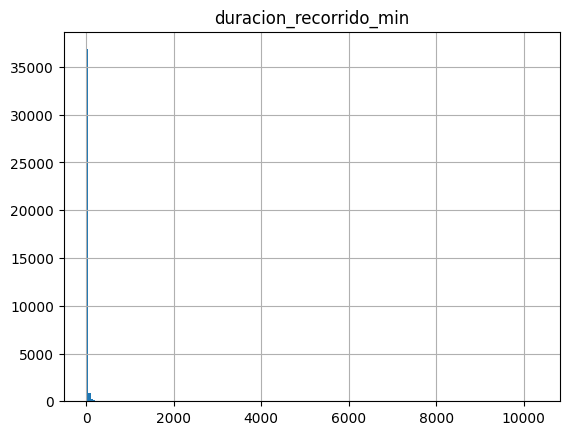

In [36]:
# Con el histograma veo que tengo datos anómalos, mas alla de los 60 minutos.
bicis_constitucion.hist('duracion_recorrido_min', bins=200)

In [37]:
# Creo un nuevo dataframe con los registros dentro de la hora
bicis_constitucion_hora = bicis_constitucion[bicis_constitucion['duracion_recorrido_min'] < 60]

In [38]:
bicis_constitucion_hora.shape

(37197, 21)

array([[<Axes: title={'center': 'duracion_recorrido_min'}>]], dtype=object)

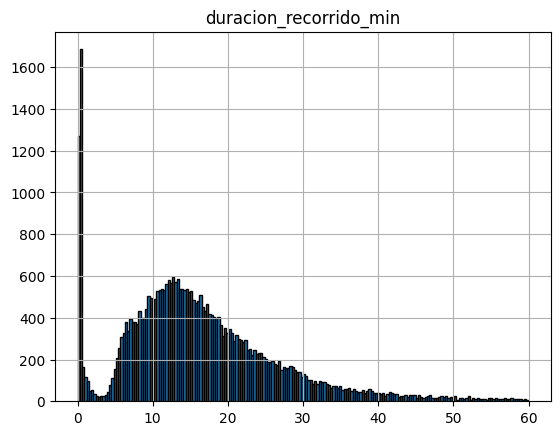

In [39]:
# El histograma muestra una mejor distribución
bicis_constitucion_hora.hist('duracion_recorrido_min', bins=200, edgecolor='black')

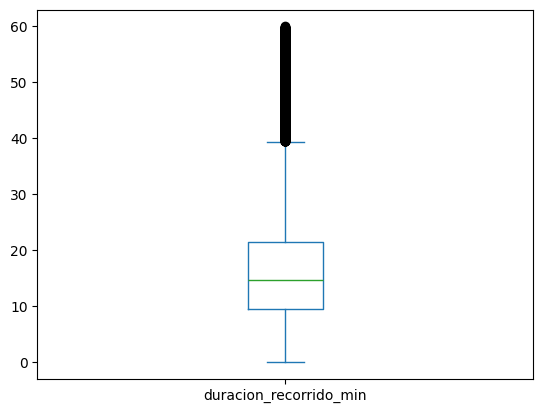

In [40]:
# El boxplot es otro gráfico que me brinda información sobre los datos.
bicis_constitucion_hora['duracion_recorrido_min'].plot(kind='box')
plt.show()

In [41]:
# El método describe() me brinda los estadísticos principales de una columna
bicis_constitucion_hora['duracion_recorrido_min'].describe()

count    37197.000000
mean        16.246655
std         10.578923
min          0.000000
25%          9.466667
50%         14.616667
75%         21.450000
max         59.983333
Name: duracion_recorrido_min, dtype: float64

# 5. Cálculo de FDPS

In [51]:
# En una variable preparar la columna del df que quiero ajustar
fdp_constitucion_hora = Fitter(bicis_constitucion_hora.duracion_recorrido_min)

In [52]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_constitucion_hora.fit()

2025-04-25 00:59:51.632 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2025-04-25 00:59:51.731 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.018133)
2025-04-25 00:59:51.741 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.033408)
2025-04-25 00:59:51.749 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.029668)
2025-04-25 00:59:51.761 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.041165)
2025-04-25 00:59:51.838 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=0.027918)
2025-04-25 00:59:51.839 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.017211)
2025-04-25 00:59:51.843 | INFO     | fitter.fitter:_fit_single_distribution:333 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,0.015564,972.453598,998.025548,0.122760,0.073266,4.370135e-174
nct,0.016654,999.898735,1033.994668,0.117928,0.045998,7.888424e-69
exponnorm,0.016704,989.246267,1014.818217,0.121454,0.048684,4.674244e-77
dweibull,0.016747,1051.877280,1077.449230,0.118847,0.071050,1.001159e-163
dgamma,0.016763,1047.691420,1073.263370,0.117245,0.071543,5.268563e-166
jf_skew_t,0.016814,996.363646,1030.459580,0.123743,0.048521,1.519414e-76
gennorm,0.016852,1054.243739,1079.815689,0.120291,0.072077,1.740486e-168
hypsecant,0.016872,1048.857338,1065.905305,0.120176,0.067924,1.168223e-149
laplace_asymmetric,0.016951,985.239715,1010.811666,0.099799,0.039117,6.872255e-50
t,0.017021,1052.388675,1077.960625,0.124251,0.064477,6.968936e-135


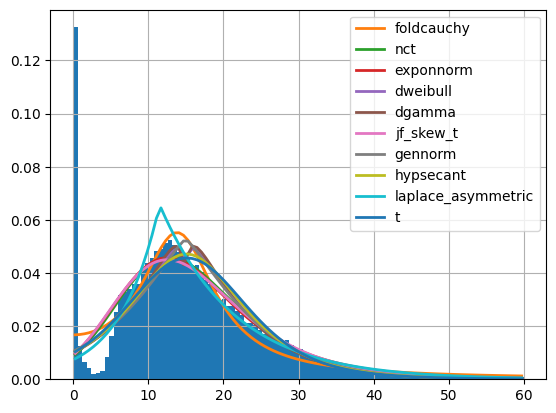

In [53]:
# Summary me muestra el resumen de los mejores ajustes
fdp_constitucion_hora.summary(10)

# 6. Simulacion

In [57]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_constitucion_hora.get_best(method='sumsquare_error')

{'foldcauchy': {'c': 2.307928339489985,
  'loc': -4.543898197903866e-09,
  'scale': 6.019983645274758}}

In [58]:
fdp_constitucion_hora.get_best(method='ks_statistic')

{'laplace_asymmetric': {'kappa': 0.7251135824984483,
  'loc': 11.516666854568195,
  'scale': 7.233781792406836}}

In [59]:
# Para simular, guardo los valores de los parámetros en 4 variables
dfn = 10.210149046195188
dfd = 24.449261873976212
loc = -0.210629715477468
scale =  15.900756775955681

In [60]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f = stats.f.rvs(dfn, dfd, loc=loc, scale=scale, size=35000)

In [61]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f

array([21.65396585, 17.53160311,  5.22615732, ..., 12.80031618,
       43.60277242, 17.24735464])

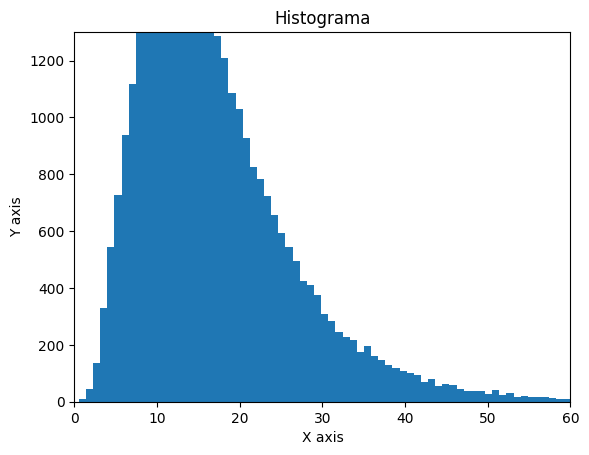

In [62]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 60)
plt.ylim(0, 1300)
plt.hist(fdp_f, bins=150)
plt.show()